<a href="https://colab.research.google.com/github/anjha1/FWI-Fire-Weather-Index-Prediction-project/blob/master/da_algerian_forest_fires_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- **Project Name:** Algerian Forest Fires Dataset Analysis and Machine Learning
- **Student Name:** Achhuta Nand Jha

                                                                          Data Analysis and Machine learning

# **Algerian Forest Fires Dataset**

> **[Excel Sheet Link](https://drive.google.com/file/d/16vfdBBzpx0Lua0ZmTdDkJXR5TS4w_u8e/view?usp=sharing)**

> **[Experiment Notebook - AutoAI Notebook v2.0.3](https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/85ef6057-e622-48e6-962b-0ea0c4ae59ed/view?access_token=2667aa4e8e6d87e346a2651610ba432857d9746bb38ae0b008ccf50aa124cbd2&context=cpdaas)**


> **API reference**

**Direct link**


>**Private endpoint**



```
# https://private.us-south.ml.cloud.ibm.com/ml/v4/deployments/684ff05e-c3ae-40db-935f-92a8fda8c6b6/predictions?version=2021-05-01

```

> **Public endpoint**



```
# https://us-south.ml.cloud.ibm.com/ml/v4/deployments/684ff05e-c3ae-40db-935f-92a8fda8c6b6/predictions?version=2021-05-01
```





> **API_KEY = "3Krrph11i4fNx1CDd6U-sL_NPCvMP4lqB97d8xVYApk5"**






.



---



---



---



---



---



---



---



.

> **Dataset Overview:**

*   **Regions Covered:** Bejaia (northeast) and Sidi Bel-Abbes (northwest)

*   **Instances:** 244 (122 for each region)

*   **Time Period:** June 2012 to September 2012


*   **Attributes:**11 input attributes and 1 output attribute (class)



*   **Classes:**
       * Fire: 138 instances                
       * Not Fire: 106 instances








Here's the attribute information formatted as you wrote it:

1. **Date:** (DD/MM/YYYY) Day, month (June to September), year (2012) Weather data observations  
2. **Temp:** Temperature at noon (maximum temperature) in Celsius degrees: 22 to 42  
3. **RH:** Relative Humidity in %: 21 to 90  
4. **Ws:** Wind speed in km/h: 6 to 29  
5. **Rain:** Total precipitation for the day in mm: 0 to 16.8  
6. **Fine Fuel Moisture Code (FFMC):** Index from the FWI system: 28.6 to 92.5  
7. **Duff Moisture Code (DMC):** Index from the FWI system: 1.1 to 65.9  
8. **Drought Code (DC):** Index from the FWI system: 7 to 220.4  
9. **Initial Spread Index (ISI):** Index from the FWI system: 0 to 18.5  
10. **Buildup Index (BUI):** Index from the FWI system: 1.1 to 68  
11. **Fire Weather Index (FWI):** Index from the FWI system: 0 to 31.1  
12. **Classes:** Two classes, namely Fire and Not Fire

.



---



---



---



---



.

### **Data Cleaning and Preparation:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import pandas as pd

url = "https://drive.google.com/uc?export=download&id=16vfdBBzpx0Lua0ZmTdDkJXR5TS4w_u8e"
dataset = pd.read_csv(url)

In [ ]:
# dataset=pd.read_csv('/content/Algerian_forest_fires_dataset.csv')

In [ ]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### **DATA CLEANING**

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [ ]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1

In [ ]:
df=dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df[["Region"]]=df[["Region"]].astype(int)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [ ]:
df.iloc[122]

,122
day,1
month,6
year,2012
Temperature,32
RH,71
Ws,12
Rain,0.7
FFMC,57.1
DMC,2.5
DC,8.2


In [ ]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.iloc[122]

,122
day,1
month,6
year,2012
Temperature,32
RH,71
Ws,12
Rain,0.7
FFMC,57.1
DMC,2.5
DC,8.2


In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


### **Changes the required columns as integer data type**

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [ ]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### **Changing the other columns to float data datatype**

In [ ]:
objects=[feature for feature in df.columns if df[feature].dtype=='O']

In [ ]:
objects

['Classes']

In [ ]:
for i in objects:
  if i!='Classes':
    df[i]=df[i].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
objects

['Classes']

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### **Exploratory Data Analysis (EDA):**

In [ ]:
df_copy=df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [ ]:
df_copy['Classes'].value_counts()

,count
Classes,
1,137
0,106


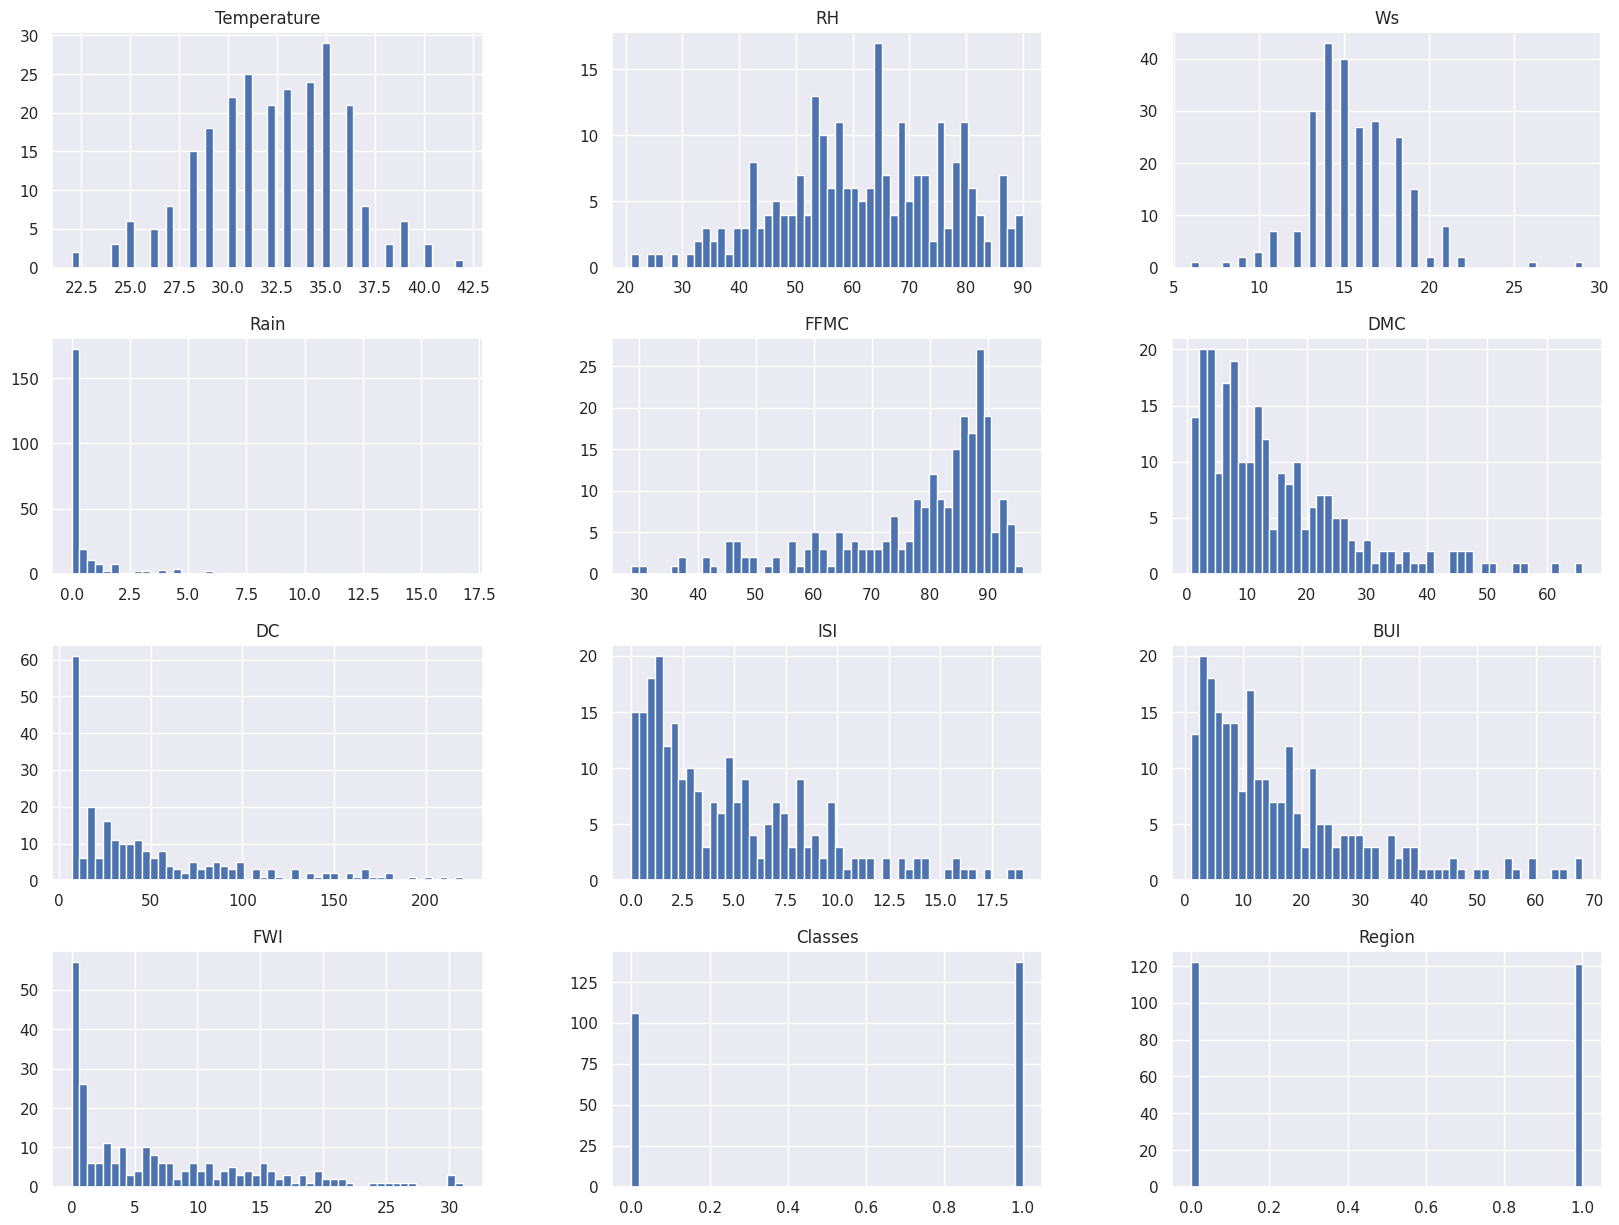

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

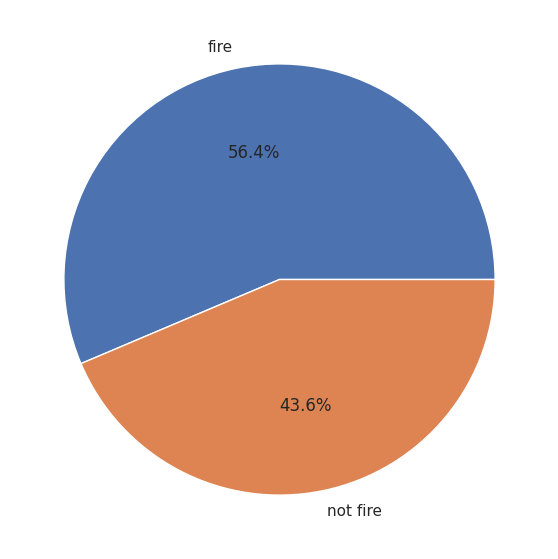

In [ ]:
classlables=['fire','not fire']
plt.figure(figsize=(7,7))
plt.pie(percentage,labels=classlables,autopct='%1.1f%%')
plt.show()

### **Correlation**

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

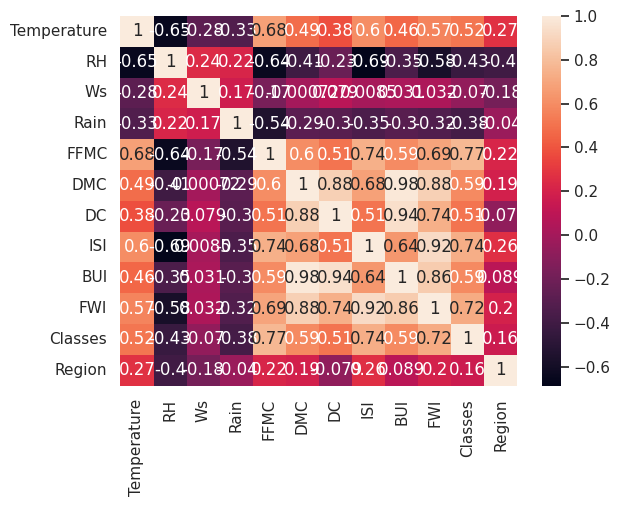

In [ ]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

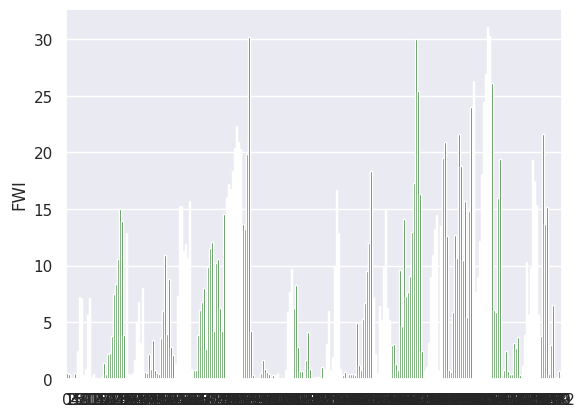

In [ ]:
sns.barplot(df['FWI'],color='green')

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

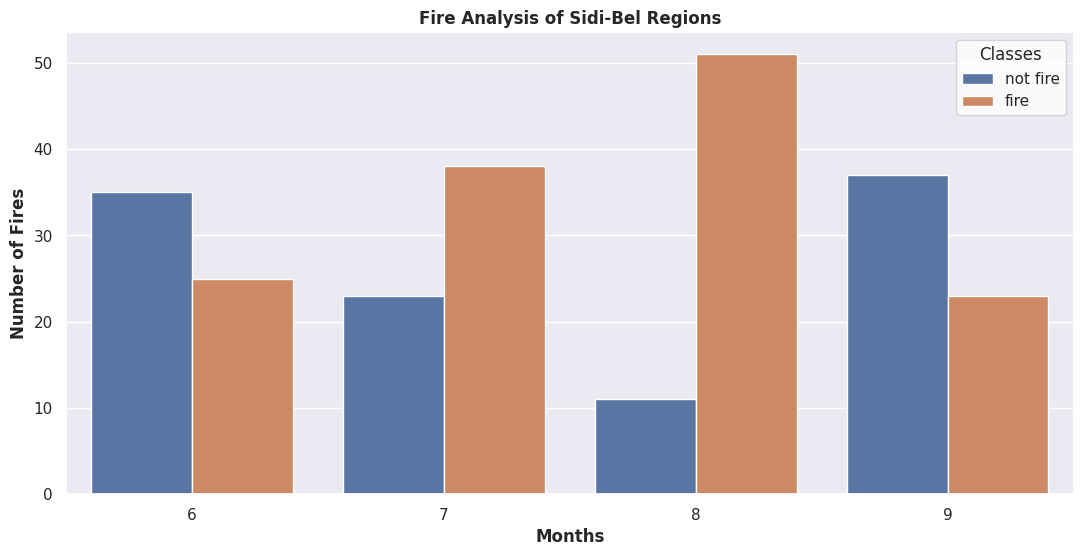

In [ ]:
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Sidi-Bel Regions', weight='bold')
plt.show()

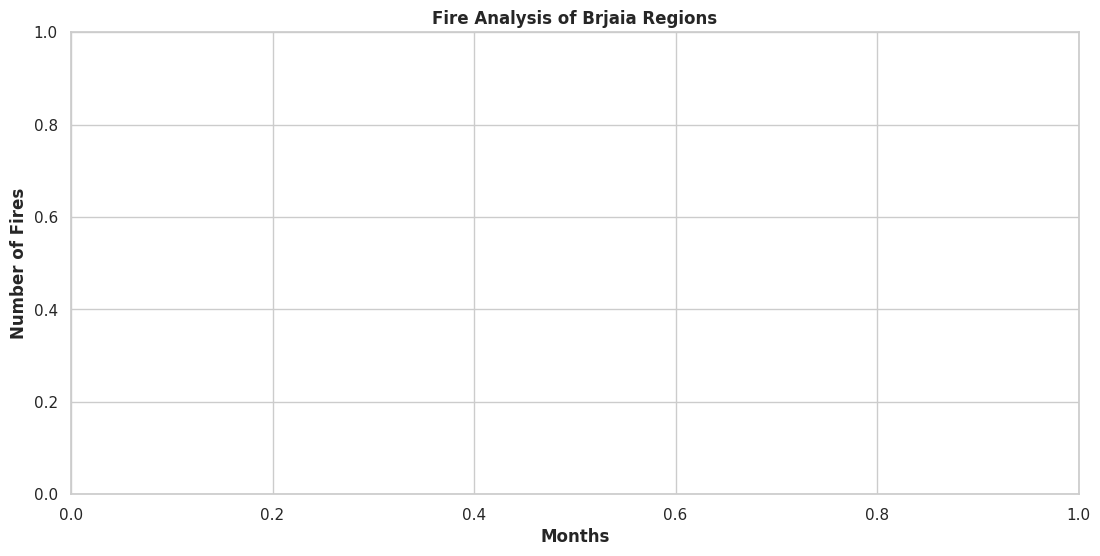

In [ ]:
dftemp = df.loc[df['Region'] == 'Brjaia']

plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=dftemp)
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('Fire Analysis of Brjaia Regions', weight='bold')
plt.show()

In [ ]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [ ]:
df1=pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df1=df1.drop(['day','month','year','Classes'],axis=1)

In [ ]:
X=df1.drop('FWI',axis=1)
y=df1['FWI']

In [ ]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1


In [ ]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0


In [ ]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((182, 10), (61, 10))

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000


### **Feature Selection**

<Axes: >

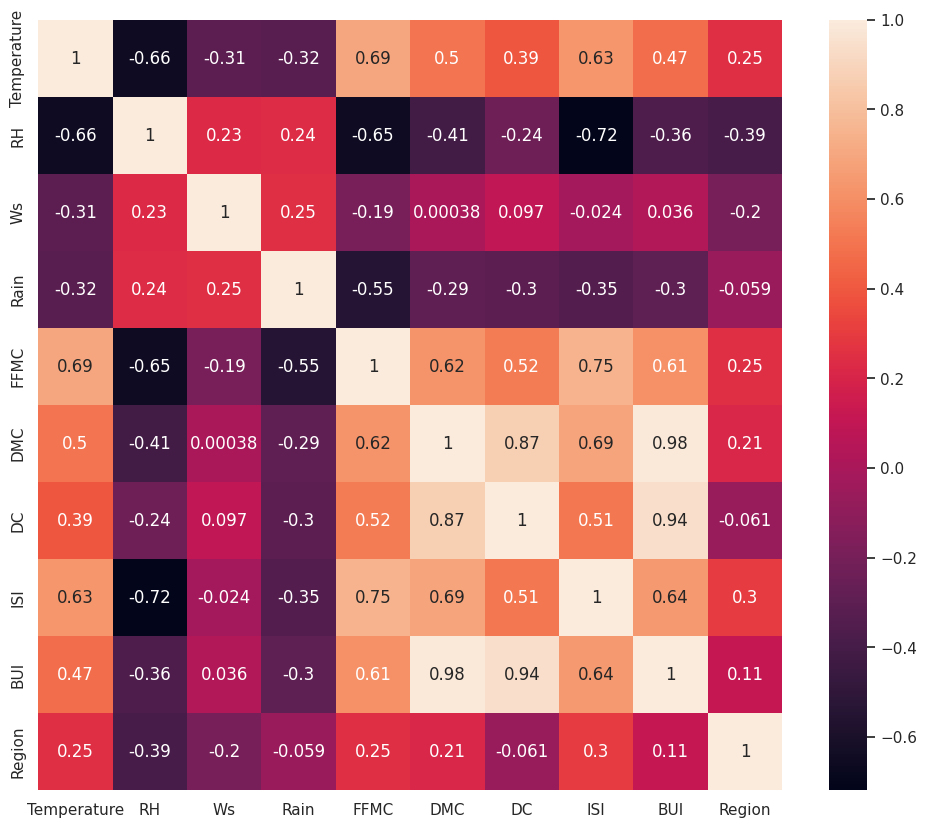

In [ ]:
plt.figure(figsize=(12, 10))
corr=X_train.corr()
sns.heatmap(corr , annot=True)

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [ ]:
# Assuming the correlation function is defined as shown previously
corr_features = correlation(X_train, 0.85)
print(corr_features)


{'DC', 'BUI'}


In [ ]:
X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)

X_train.shape, X_test.shape


((182, 8), (61, 8))

### **Feature Scaling Or Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [ ]:
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.88272888,
        -0.62963326, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.86687565,
        -0.93058524,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  0.61540157,
         2.7271388 ,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06504105,
        -1.06948615, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.37760309,
         0.5973248 ,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.01748135,
        -0.86113478, -0.98907071]])

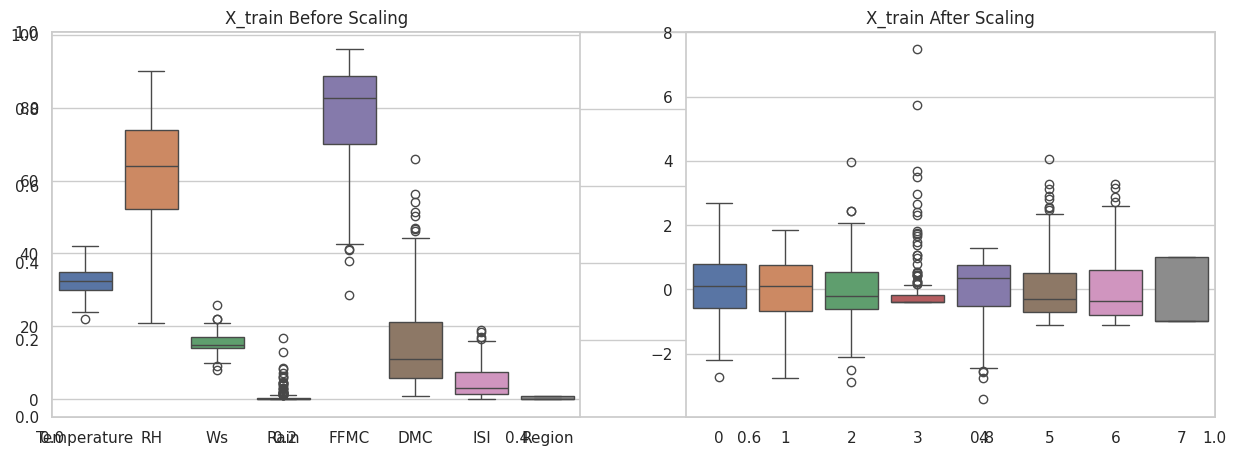

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

### **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score



linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 Score:',score)
print('Mean absolute error:',mae)

R2 Score: 0.9830321384727897
Mean absolute error: 0.5806361642310047


### **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_pred = lasso.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)


Mean absolute error: 1.133175994914409
R2 Score: 0.9492020263112388


### **Ridge Regression model**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

y_pred = ridge.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)


Mean absolute error: 0.5969613029130079
R2 Score: 0.9824907652592585


### **Elasticnet Regression**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

y_pred = elastic.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error:", mae)
print("R2 Score:", score)


Mean absolute error: 1.928441451179673
R2 Score: 0.868664603256521


### **IBM Cloud Pak for Data: Leveraging IBM Watsonx.ai for Predictive Modeling**

In [ ]:
import requests

# NOTE: you must manually set API_KEY below using information retrieved from your IBM Cloud account (https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html)
API_KEY = "3Krrph11i4fNx1CDd6U-sL_NPCvMP4lqB97d8xVYApk5"
token_response = requests.post('https://iam.cloud.ibm.com/identity/token', data={"apikey":
 API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})
mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

**Define the array of values to be scored (rows of data)**

In [ ]:
array_of_input_fields = ["day", "month", "year", "Temperature", "RH", "Ws", "Rain", "FFMC", "DMC", "DC", "ISI", "BUI", "Classes", "Region"]


array_of_values_to_be_scored = [
    [1, 6, 2012, 29, 57, 18, 0, 65.7, 3.4, 7.6, 1.3, 3.4, "not fire", 0],

]

**The payload_scoring object is now ready to be used for scoring or prediction purposes**

In [ ]:
payload_scoring = {
    "input_data": [{
        "fields": array_of_input_fields,
        "values": array_of_values_to_be_scored
    }]
}



response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/684ff05e-c3ae-40db-935f-92a8fda8c6b6/predictions?version=2021-05-01', json=payload_scoring,
 headers={'Authorization': 'Bearer ' + mltoken})
print("Scoring response")
print(response_scoring.json())

Scoring response
{'trace': '24898ae93299d1733c5b75ed749f3822', 'errors': [{'code': 'deployment_not_found', 'message': "Deployment with id '684ff05e-c3ae-40db-935f-92a8fda8c6b6' does not exist. Re-try with a valid deployment id."}]}
